<a href="https://colab.research.google.com/github/ahliminha/F_604/blob/master/CrossEntropy_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
np.random.seed(816)

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train/255
x_test = x_test/255

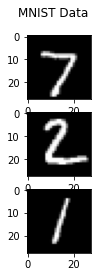

In [ ]:
fig, axs = plt.subplots(3)
fig.suptitle('MNIST Data')
for i in range(3):

  img = x_test[i]
  label = y_test[i]

  axs[i].imshow(img, cmap="gray")

In [ ]:
y_train = keras.utils.to_categorical(y = y_train)
y_test  = keras.utils.to_categorical(y = y_test)

In [ ]:
input_layer = keras.Input(shape = (28,28,1))
x = keras.layers.Conv2D(32,3)(input_layer)
x = keras.layers.Conv2D(64,3)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(100)(x)
x = keras.layers.Dense(100)(x)
output = keras.layers.Dense(10, activation='softmax')(x)

In [ ]:
model = keras.Model(inputs=input_layer, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               3686500   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010

In [ ]:
opt = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True)  # default params
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000, 10)


In [ ]:
history = model.fit(x = x_train, y = y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 3s 7ms/step - loss: 444.4028 - accuracy: 0.7780
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 1.2431 - accuracy: 0.8862
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.8092 - accuracy: 0.8948
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.5648 - accuracy: 0.8992
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4629 - accuracy: 0.9050
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3855 - accuracy: 0.9117
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3678 - accuracy: 0.9087
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3361 - accuracy: 0.9155
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3203 - accuracy: 0.9172
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3044 - accuracy: 0.91

In [ ]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3697 - accuracy: 0.9030


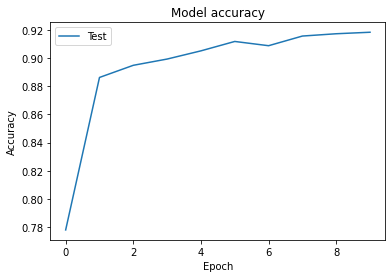

In [ ]:
# Plot test accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper left')
plt.show()

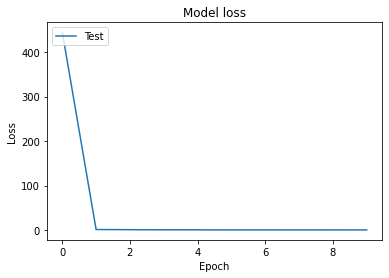

In [ ]:
# Plot test loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper left')
plt.show()